# THE SPARK FOUNDATION
### GRIP JAN2021
## TASK4:- Exploratory Data Analysis - Terrorism
# BY:- NISHITH KUMAR

### As a security/defense analyst, try to find out the hot zone of terrorism.

### What all security issues and insights you can derive by EDA?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Load the dataset

In [2]:
terr = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terr.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
terr2=terr.copy()

In [7]:
terr2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
terr2.dropna(axis=1,how='all') # dropping the columns which has null value

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### renaming the columns so that the column name would be easy to understand

In [9]:
terr2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [10]:
# considering only the useful columns
terr2=terr2[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
# filling the full null value with zero

terr2['Wounded']=terr2['Wounded'].fillna(0).astype(int)
terr2['Killed']=terr2['Killed'].fillna(0).astype(int)

In [12]:
# adding a new column casualities

terr2['casualities']=terr2['Killed']+terr2['Wounded']

In [13]:
terr2.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [14]:
terr2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities         0
dtype: int64

## some basic analysis of data set

In [15]:
print("Country with the most attacks:",terr2['Country'].value_counts().idxmax())
print("City with the most attacks:",terr2['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terr2['Region'].value_counts().idxmax())
print("Year with the most attacks:",terr2['Year'].value_counts().idxmax())
print("Month with the most attacks:",terr2['Month'].value_counts().idxmax())
print("Group with the most attacks:",terr2['Group'].value_counts().index[1])
print("Most Attack Types:",terr2['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


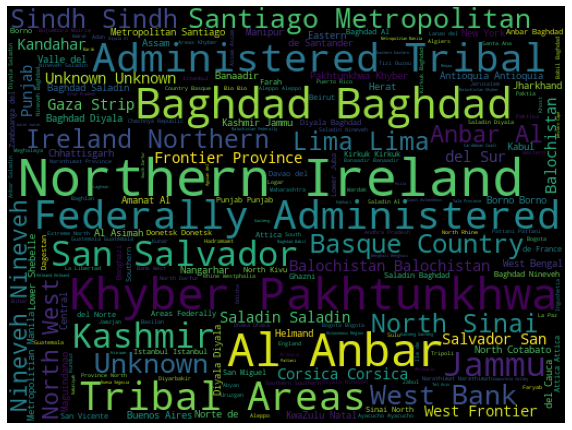

In [16]:
from wordcloud import WordCloud
from scipy import signal
cities=terr2.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='black',width=512,height=382).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## In the above wordcloud we can see that the northern island,baghdad,tribal areas,khyber and pakhtunkhwa are the most affected citites by terrorism

<AxesSubplot:>

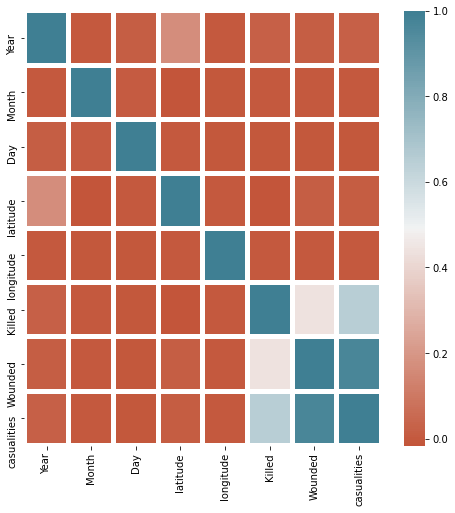

In [17]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(terr2.corr(), annot=False, linewidths=4, fmt=".1f", cmap=sns.diverging_palette(20,220,n=200))

## Number of terrorist activites each year

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


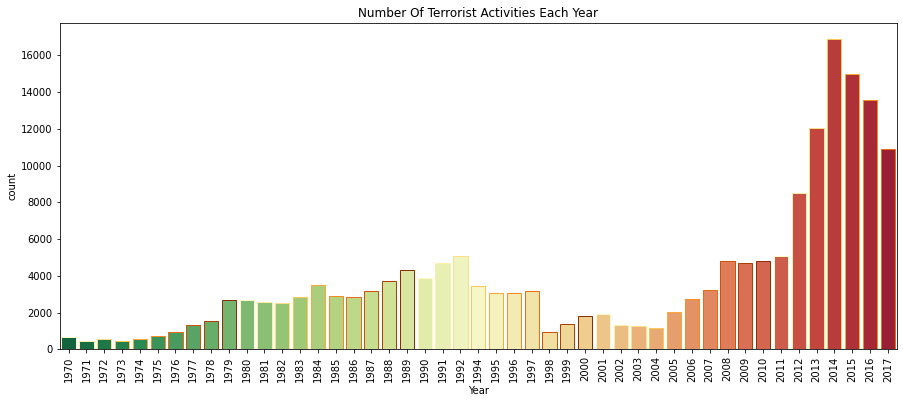

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terr2,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

The plot shows that in 2014 maximum terrorist attack occurs

## Attacking method used by terrorist

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


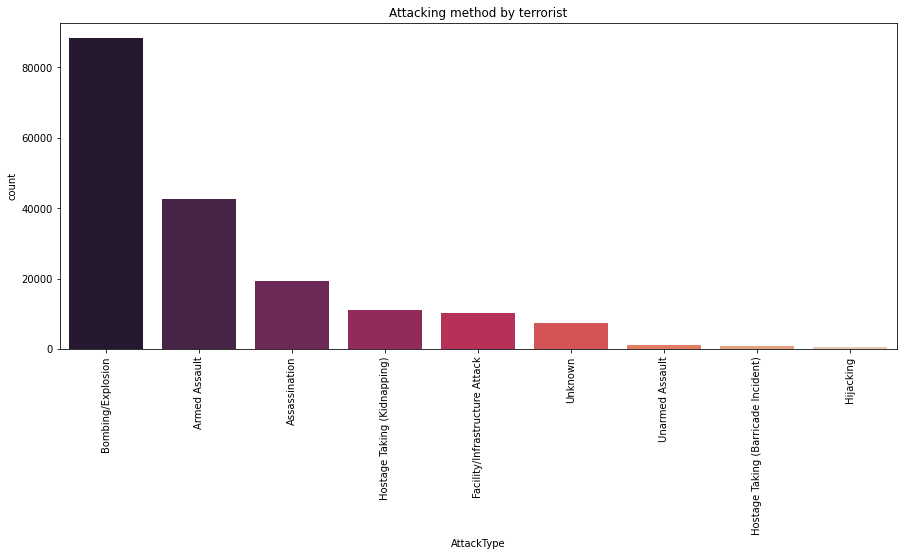

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terr2,palette='rocket',order=terr2['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking method by terrorist')
plt.show()

### Above plot shows Bombing/Explosion are mostly used attack type

## favourite target of terrorist

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


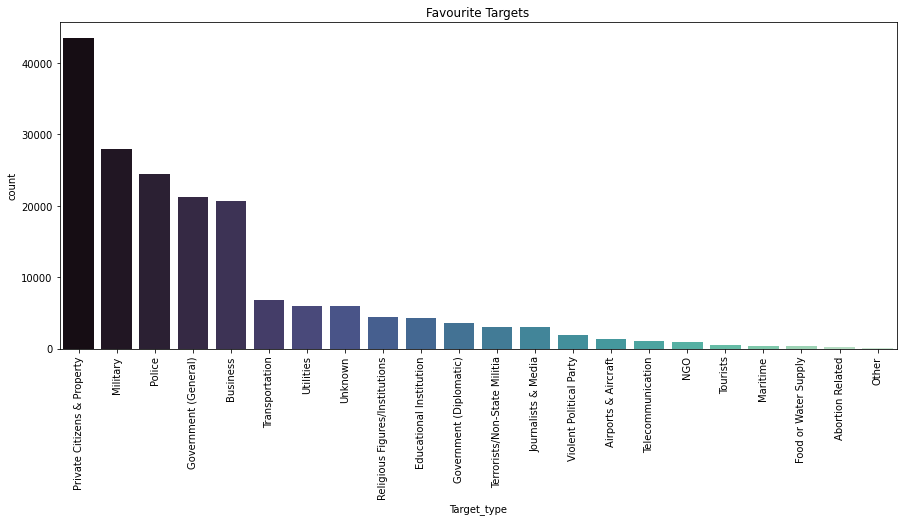

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terr2,palette='mako',order=terr2['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favourite Targets')
plt.show()

### Above plot shows Private Citizens & Property are favouriate Target

## Most affected region by terrorist activity

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


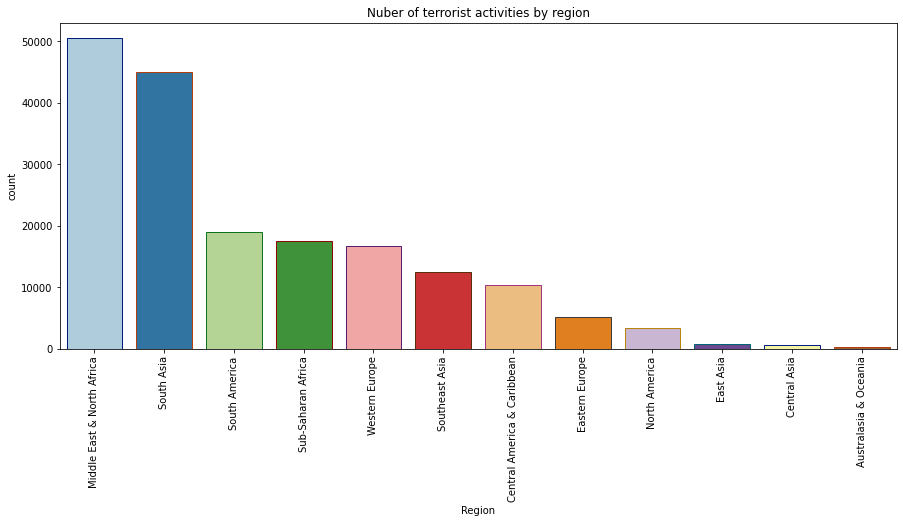

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terr2,palette='Paired',edgecolor=sns.color_palette("dark", 10),order=terr2['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Nuber of terrorist activities by region')
plt.show()

### Above plot shows that Middle East & North Africa has most terrorist activities

## Terrorist Activities by Region each year

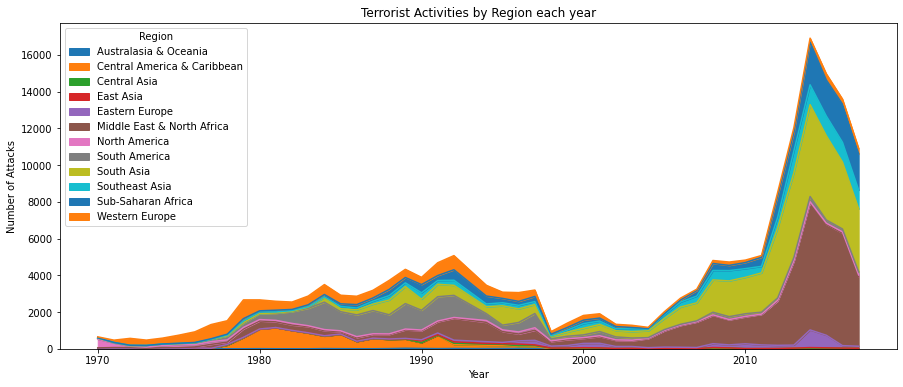

In [22]:
pd.crosstab(terr2.Year, terr2.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region each year')
plt.ylabel('Number of Attacks')
plt.show()

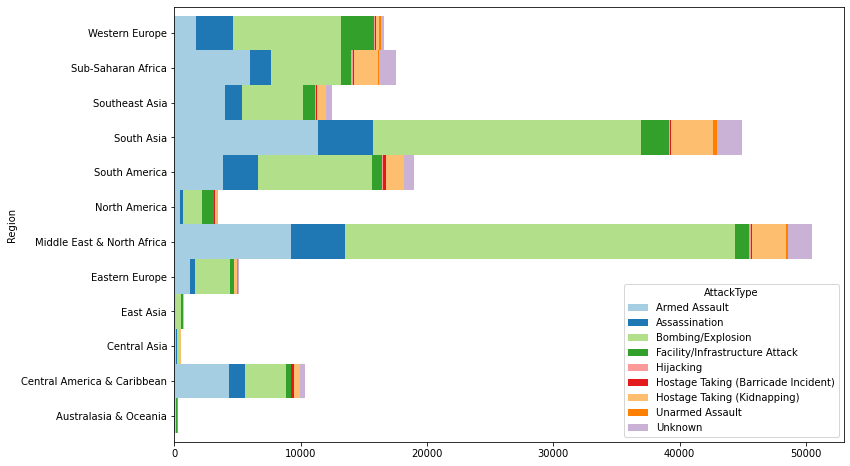

In [23]:
pd.crosstab(terr2.Region, terr2.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette("Paired", 10))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()
                                                

## The below shows the most affected country

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


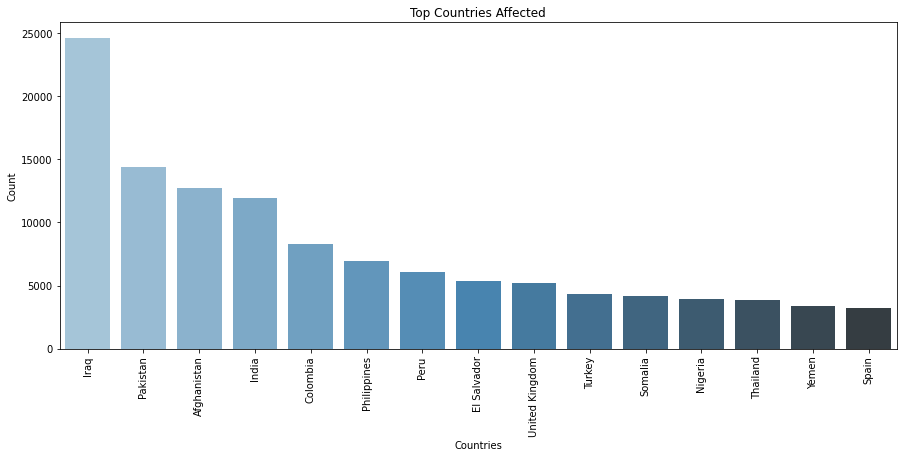

In [24]:
plt.subplots(figsize=(15,6))
sns.barplot(terr2['Country'].value_counts()[:15].index,terr2['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Above plot shows Iraq is the most affected country

## Plot to shows number of attacks and how much people are wounded and killed

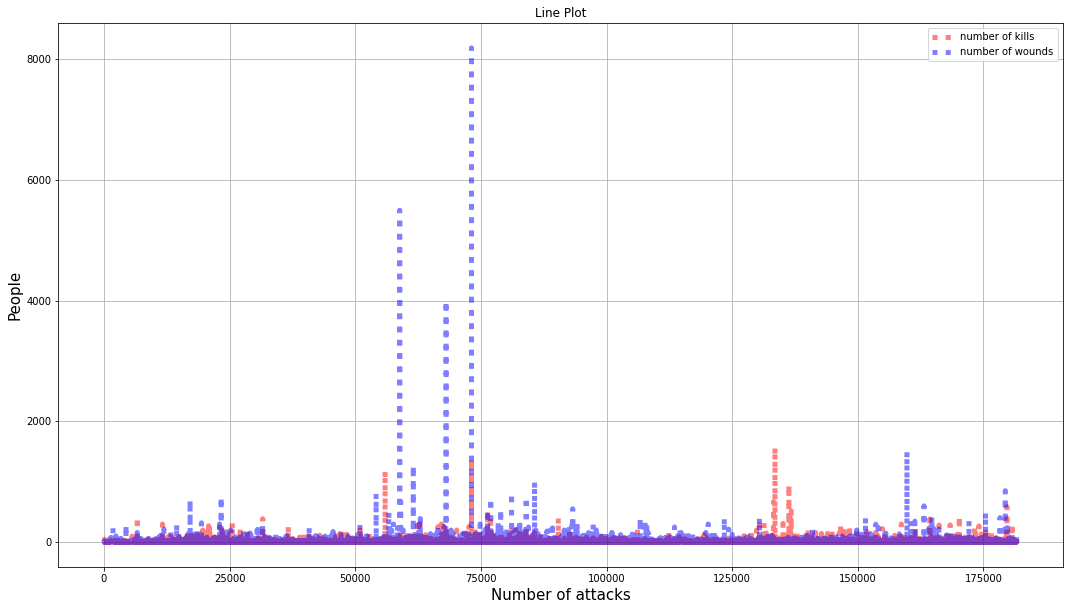

In [25]:
f,ax = plt.subplots(figsize=(18,10))
terr2.Killed.plot(color="r", label="number of kills", linewidth=5, alpha=0.5, grid=True, linestyle=":")
terr2.Wounded.plot(color="b", label="number of wounds", linewidth=5, alpha=0.5, grid=True, linestyle=":")
plt.title('Line Plot')
plt.legend(loc="upper right")
plt.xlabel("Number of attacks", size=15)
plt.ylabel("People", size=15)
plt.show()

## The plot shows the number of attacks that took place and the no. of people killed

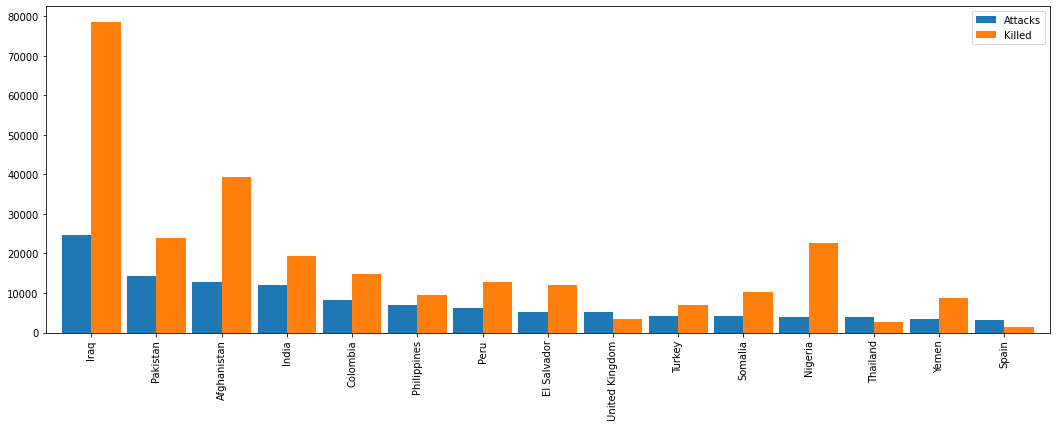

In [26]:
coun_terror = terr2['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terr2.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## The below plot shows the no.of killings that took place over the years and what type of weapon was most used

Text(0.5, 1.0, 'Year vs kill Scatter Plot')

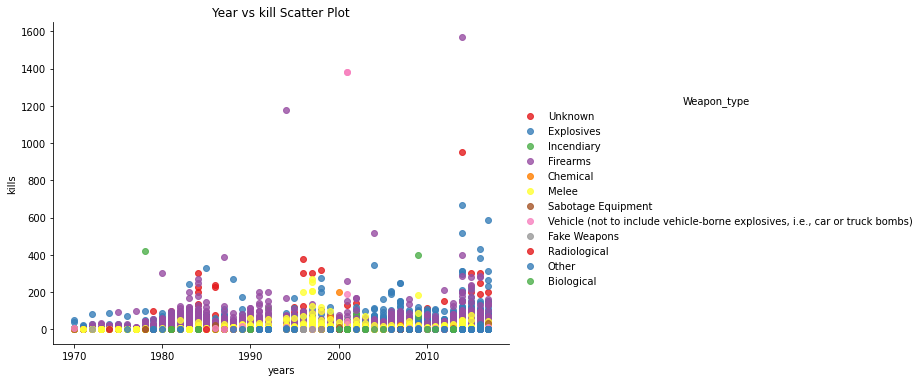

In [27]:
sns.lmplot(x='Year', y='Killed', data=terr2, fit_reg=False,hue='Weapon_type',legend=True, palette="Set1",aspect=15/10) # subcategory
plt.xlabel("years")
plt.ylabel("kills")
plt.title("Year vs kill Scatter Plot")

## The below plot shows the terrorist groups with highest terror attack

C:\Users\HELLO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


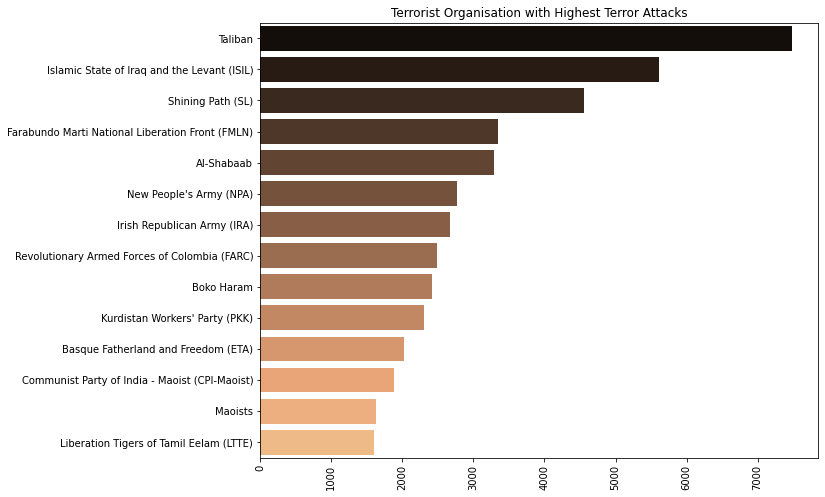

In [28]:
sns.barplot(terr2['Group'].value_counts()[1:15].values,terr2['Group'].value_counts()[1:15].index,palette=("copper"))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

In [29]:
##   Creating a new data frame

terror_df=terr2[(terr2['Group']!='Unknown') & (terr2['casualities']>50)]

In [30]:
terror_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [31]:
terror_df=terror_df.sort_values(['Region','Country'])

In [32]:
terror_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
4198,1976,10,6,Barbados,Christ Church,Central America & Caribbean,Grantly Adams International Airport,13.077333,-59.493008,Bombing/Explosion,73,0,Cubana Airlines DC-8,NaN,Coordination of the United Revolutionary Organ...,Airports & Aircraft,Explosives,NaN,73
11087,1980,6,2,El Salvador,Morazan,Central America & Caribbean,Osicala,13.805691,-88.145787,Armed Assault,40,100,national guard unit,NaN,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,NaN,140
12110,1980,10,18,El Salvador,Usulutan,Central America & Caribbean,San Agustin,13.432040,-88.592239,Unknown,58,0,"18 guardsmen, + 40 of their collaborators",NaN,Farabundo Marti National Liberation Front (FMLN),Police,Unknown,NaN,58
12673,1981,1,17,El Salvador,La Union,Central America & Caribbean,Albornoz Arriba,13.582486,-87.945460,Armed Assault,87,0,Military Units,NaN,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,NaN,87
15592,1982,3,3,El Salvador,San Vicente,Central America & Caribbean,Amatitan Arriba,13.755754,-88.732730,Armed Assault,60,0,Military unit,NaN,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,NaN,60


In [33]:
terror_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

## Dropping the column that are least necessary for the analysis

In [34]:
terror_df=terror_df.drop(['latitude','longitude','Motive','Summary','Target'],axis=1)

In [35]:
terror_df.head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Wounded,Group,Target_type,Weapon_type,casualities
4198,1976,10,6,Barbados,Christ Church,Central America & Caribbean,Grantly Adams International Airport,Bombing/Explosion,73,0,Coordination of the United Revolutionary Organ...,Airports & Aircraft,Explosives,73
11087,1980,6,2,El Salvador,Morazan,Central America & Caribbean,Osicala,Armed Assault,40,100,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,140
12110,1980,10,18,El Salvador,Usulutan,Central America & Caribbean,San Agustin,Unknown,58,0,Farabundo Marti National Liberation Front (FMLN),Police,Unknown,58
12673,1981,1,17,El Salvador,La Union,Central America & Caribbean,Albornoz Arriba,Armed Assault,87,0,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,87
15592,1982,3,3,El Salvador,San Vicente,Central America & Caribbean,Amatitan Arriba,Armed Assault,60,0,Farabundo Marti National Liberation Front (FMLN),Military,Firearms,60


In [36]:
# Dropping the null values from cities

terror_df= terror_df.dropna(subset=['city'])

In [37]:
terror_df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          3
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

## Ploting the graph of four most affected countries

In [38]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly
import plotly.express as px

In [39]:
hover_text = []
for index, row in terror_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'Group: {group}<br>'+
                      'casualities: {casualities}<br>'+
                      'Year: {year}').format(city=row['city'],
                                            group=row['Group'],
                                            casualities=row['casualities'],
                                            year=row['Year']))
terror_df['text'] = hover_text

In [40]:
trace0 = go.Scatter(
    x=terror_df['Year'][terror_df['Country'] == 'Iraq'],
    y=terror_df['casualities'][terror_df['Country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_df['text'][terror_df['Country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_df['casualities'][terror_df['Country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_df['Year'][terror_df['Country'] == 'Pakistan'],
    y=terror_df['casualities'][terror_df['Country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_df['text'][terror_df['Country'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_df['casualities'][terror_df['Country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_df['Year'][terror_df['Country'] == 'Afghanistan'],
    y=terror_df['casualities'][terror_df['Country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_df['text'][terror_df['Country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_df['casualities'][terror_df['Country'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_df['Year'][terror_df['Country'] == 'India'],
    y=terror_df['casualities'][terror_df['Country'] == 'India'],
    mode='markers',
    name='India',
    text=terror_df['text'][terror_df['Country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_df['casualities'][terror_df['Country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

In [41]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'The Big Four',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False,color='black'
             ),
         yaxis = dict(
             title = 'Casualities',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False,color='black'),
         paper_bgcolor='rgb(238, 130, 238)',
         plot_bgcolor='rgb(238, 130, 238)',
         )

In [42]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')
fig.show()

## Value count of attacks carried out by the terrorist organization

In [43]:
terr2.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

## Below is the map showing the parts of the countries that is attacked by the top 8 terrorist organization

In [44]:
import folium
from folium.plugins import MarkerCluster

In [45]:
terror_group = terr2.dropna(subset=['latitude','longitude'])

In [46]:
terror_group = terror_group.drop_duplicates(subset=['Country','Group'])

In [47]:
terrorist_groups = terror_group.Group.value_counts()[1:8].index.tolist()

In [48]:
terror_group = terror_group.loc[terror_group.Group.isin(terrorist_groups)]

In [49]:
terror_group.Group.unique()

array(['Palestinians', 'Neo-Nazi extremists', 'Black September',
       'Muslim extremists', 'Separatists', 'Gunmen',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [50]:
m = folium.Map(location=[20, 0], tiles="stamenterrain", zoom_start=2)
marker_cluster = MarkerCluster( name='clustered icons',overlay=True,control=False,icon_create_function=None)
for i in range(0,len(terror_group)):
    marker = folium.Marker([terror_group.iloc[i]['latitude'],terror_group.iloc[i]['longitude']])
    popup='Group:{}<br>Country:{}'.format(terror_group.iloc[i]['Group'], terror_group.iloc[i]['Country'])
    
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
    
marker_cluster.add_to(m)
folium.TileLayer("openstreetmap").add_to(m)
folium.TileLayer("Mapbox Bright").add_to(m)
folium.TileLayer("cartodbdark_matter").add_to(m)
folium.TileLayer("stamentoner").add_to(m)
folium.LayerControl().add_to(m)
 # Save it as html
# m.save('Terrorist_Organizations_in_Country.html')

In [51]:
m

In [52]:
from folium.plugins import HeatMap

In [53]:
attack = terr2.loc[terr2.Year==2014][['latitude','longitude']]
attack.latitude.fillna(0,inplace= True)
attack.longitude.fillna(0,inplace= True)

world = folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(world)
print("Terrorism around the world in 2014")
world

Terrorism around the world in 2014


## The above map shows the the terrorism that took place in 2014,as 2014 is the year in which maximum terror attack took place

In [54]:
from wordcloud import STOPWORDS

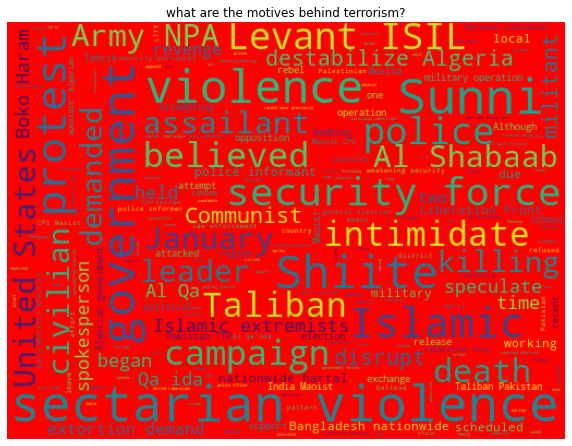

In [55]:
text = terr2.Motive.dropna()
text = " ".join(str(motive) for motive in terr2.Motive)
stopwords = set(STOPWORDS)
stopwords.update(["say","NaN","specific" ,"carried","incident","responsibility","claimed","noted","minority", "nothing",
                  "party","Party","noted","attack","motive","source","sources","stated","part","new", "us","The", "specific", "motive", "for",
                  "attack", "is", "unknown", "which", "Unknown","occurred", "occured","Occured", "state", "reported", "member", "group", "area", "related", "intended",
                  "larger","trend","may","target","targeted","suspected","speculated","retaliation","retalisation",
                  "says","call","unknown","nan","NAN","majority","communities","victim", "killed" ,"people", "posited",
                  "victims","attacks","response","United States","accused","iraq","note","stating",
                 "authorities","order","members"])
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopwords,background_color='red',width=512,height=382).generate(text)
plt.axis('off')
plt.title("what are the motives behind terrorism?")
plt.imshow(wordcloud)
plt.show()

## Above shows the reason behind the attack:-
1. Violence
2. Assailant